https://thegradient.pub/gaussian-process-not-quite-for-dummies/ <br>
https://distill.pub/2019/visual-exploration-gaussian-processes/ <br>

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

<h1> Gaussian Process </h1>

In [82]:
x = np.random.normal(0, 1, 540)
y =np.random.normal(0, 1, 540)
X = np.vstack((x, y)).T
S = np.array([[2,3],
              [1,0.3]])
X = S.dot(X.T).T

In [83]:
S = np.cov(X.T)
eigen_values , V = np.linalg.eigh(S)
V

array([[ 0.22010413, -0.97547638],
       [-0.97547638, -0.22010413]])

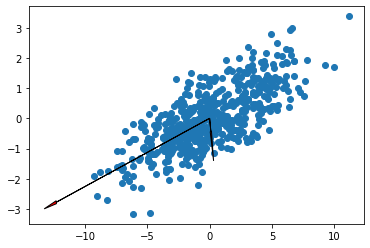

In [84]:
plt.scatter(X[:,0],X[:,1])
ax = plt.gca()
ax.arrow(0,0,eigen_values[0]*V[0,0],eigen_values[0]*V[1,0], head_width=0.1, head_length=1, fc='red', ec='black')
ax.arrow(0,0,eigen_values[1]*V[0,1],eigen_values[1]*V[1,1], head_width=0.1, head_length=1, fc='red', ec='black')

array([[-0.74599622, -0.66595018],
       [ 0.66595018, -0.74599622]])

(array([  4.,  10.,  35., 121., 140., 106.,  80.,  32.,   8.,   4.]),
 array([-3.16494779, -2.51064585, -1.8563439 , -1.20204196, -0.54774001,
         0.10656194,  0.76086388,  1.41516583,  2.06946777,  2.72376972,
         3.37807167]),
 <BarContainer object of 10 artists>)

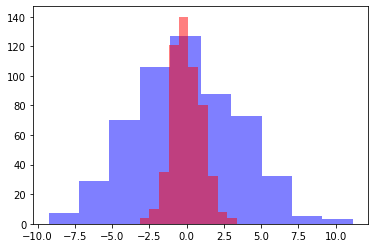

In [85]:
plt.hist(X[:,0],alpha = 0.5,color='b')
plt.hist(X[:,1],alpha = 0.5,color='r')

We will first explore the mathematical foundation that Gaussian processes are built on — we invite you to follow along using the interactive figures and hands-on examples.

Before we can explore Gaussian processes, we need to understand the mathematical concepts they are based on. As the name suggests, the Gaussian distribution (which is often also referred to as normal distribution) is the basic building block of Gaussian processes. In particular, we are interested in the multivariate case of this distribution, where each random variable is distributed normally and their joint distribution is also Gaussian. 

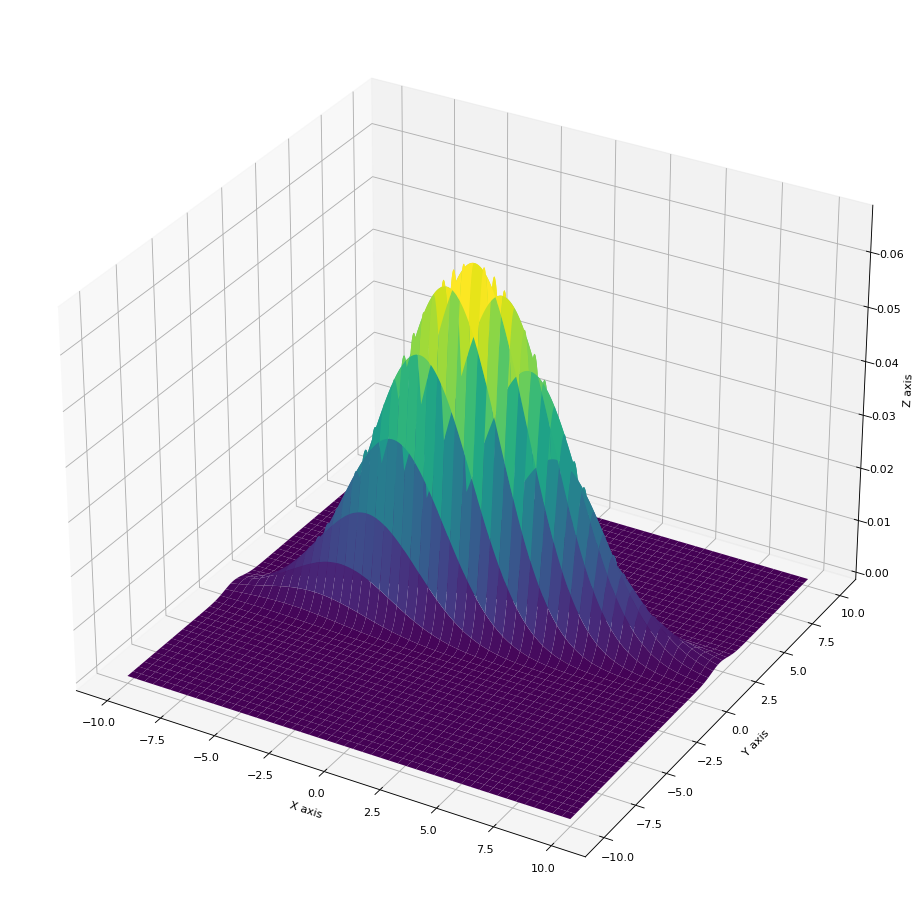

In [96]:


#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,x.size)
y = np.linspace(-10,10,x.size)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([0, 0], S )
print(rv)
#Make a 3D plot
fig = plt.figure(figsize=(15, 15), dpi=80)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()